# Modelo Ciclo de Otto

Importar librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import diagrama_pv, diagrama_ts, LABEL_SIZE

## Definir funciones
Para la presión de un gas en un proceso isoentrópio (y por lo tanto adiabático) y admisión/eliminación de calor a volumen constante 

### Para diagrama Pv

In [2]:
# Valores dados para que calce con el gráfico
gamma = np.log(3) / np.log(5)

def pressure_adiabatic(v, P1, v1):
    return P1*np.power(v1/v, gamma)

### Para diagrama TS

In [3]:
c_v = 4 / np.log(3)

def temperature(S, T1, S1):
    return T1*np.exp((S-S1)/c_v)

## Valores iniciales

In [4]:
v_a = 5
P_a = 1
v_b = 1
P_c = 5.5

S_a = 1
T_a = 1
S_d = 5
T_c = 5.5

## Cálcular otros valores

In [5]:
v_ab = np.linspace(v_a, v_b)
P_ab = pressure_adiabatic(v_ab, P_a, v_a)
P_b = pressure_adiabatic(v_b, P_a, v_a)
v_c = v_b
v_d = v_a
v_cd = np.linspace(v_c, v_d)
P_cd = pressure_adiabatic(v_cd, P_c, v_c)
P_d = pressure_adiabatic(v_d, P_c, v_c)

S_da = np.linspace(S_d, S_a)
T_da = temperature(S_da, T_a, S_a)
T_d = temperature(S_d, T_a, S_a)
S_c = S_d
S_b = S_a
S_bc = np.linspace(S_b, S_c)
T_bc = temperature(S_bc, T_c, S_c)
T_b = temperature(S_b, T_c, S_c)

## Graficar

### Diagrama Pv

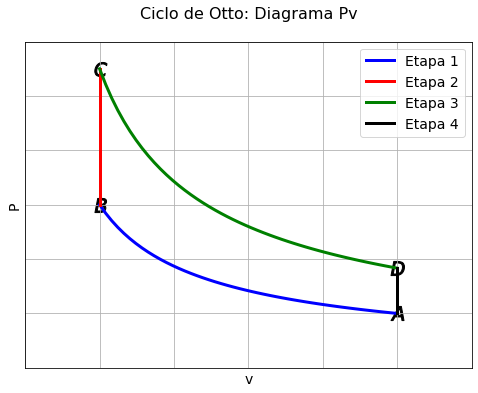

In [6]:
v = [
    v_ab,
    [v_b, v_c],
    v_cd,
    [v_d, v_a]
]
P = [
    P_ab,
    [P_b, P_c],
    P_cd,
    [P_d, P_a]
]
ax = diagrama_pv(v, P, "Ciclo de Otto", True)
ax.set_xlim(0, 6)
ax.set_ylim(0, 6)

plt.savefig("Matplotlib/ciclo_otto_pv.png")

### Diagrama TS

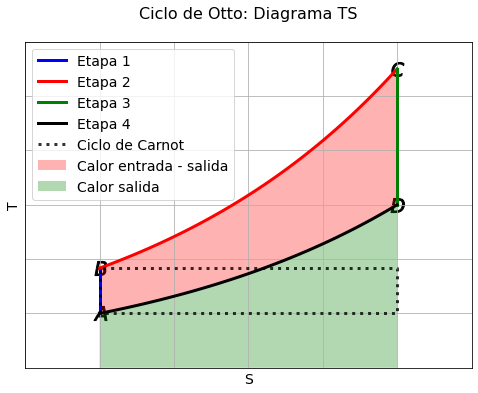

In [7]:
S = [
    [S_a, S_b],
    S_bc,
    [S_c, S_d],
    S_da
]
T = [
    [T_a, T_b],
    T_bc,
    [T_c, T_d],
    T_da
]

ax = diagrama_ts(S, T, "Ciclo de Otto", True)

S_ad = list(reversed(S_da))
T_ad = list(reversed(T_da))

ax.fill_between(S_ad, T_ad, T_bc, facecolor='r', alpha=0.3, label="Calor entrada - salida")
ax.fill_between(S_ad, T_ad, facecolor='g', alpha=0.3, label="Calor salida")

ax.plot([S_a, S_b, S_c, S_d, S_a], [T_a, T_b, T_b, T_a, T_a], ':k', linewidth=3, label="Ciclo de Carnot", alpha=0.8)
ax.legend(fontsize=LABEL_SIZE)

ax.set_xlim(0, 6)
ax.set_ylim(0, 6)

plt.savefig("Matplotlib/ciclo_otto_ts.png")